In [2]:
import pandas as pd

data = pd.read_csv("train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape


(891, 12)

In [4]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)



In [7]:
data['Age'] = data['Age'].fillna(data['Age'].median())


In [8]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [9]:
data.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [10]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


In [11]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [12]:
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [13]:
X = data.drop('Survived', axis=1)


In [14]:
y = data['Survived']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7988826815642458

In [19]:
data.groupby('Sex')['Survived'].mean()


,Survived
Sex,
0,0.188908
1,0.742038


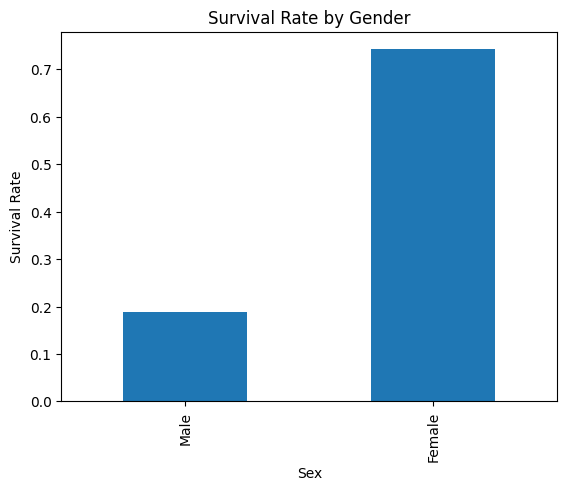

In [20]:
import matplotlib.pyplot as plt

data.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()


In [21]:
data['Child'] = data['Age'] < 16


In [22]:
data.groupby('Child')['Survived'].mean()


,Survived
Child,
False,0.362624
True,0.590361


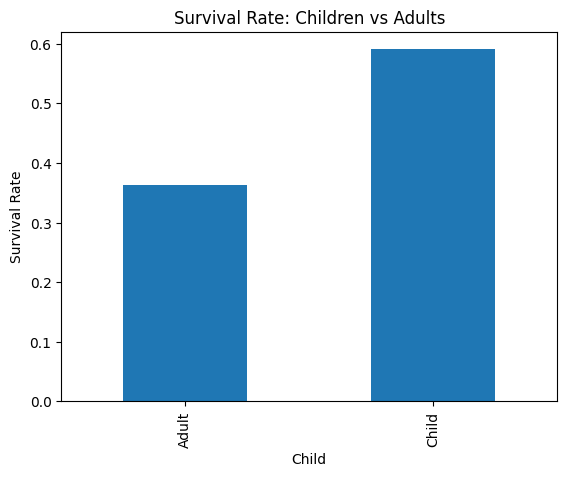

In [23]:
data.groupby('Child')['Survived'].mean().plot(kind='bar')
plt.xticks([0, 1], ['Adult', 'Child'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate: Children vs Adults')
plt.show()


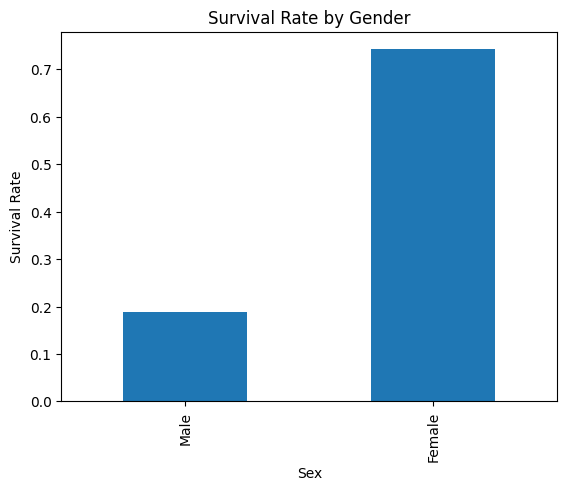

In [24]:
import matplotlib.pyplot as plt

data.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()


In [25]:
data['Child'] = data['Age'] < 16


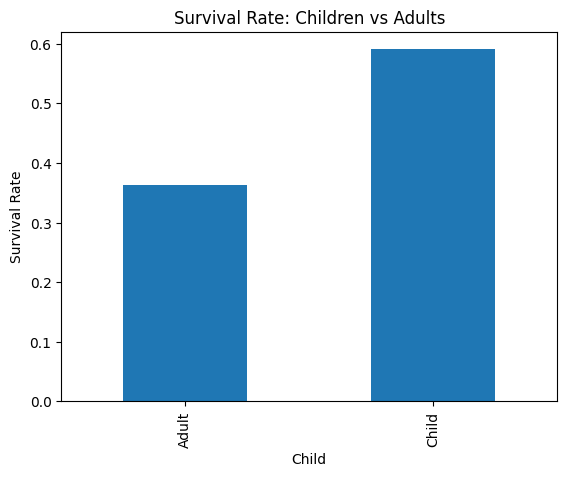

In [26]:
data.groupby('Child')['Survived'].mean().plot(kind='bar')
plt.xticks([0, 1], ['Adult', 'Child'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate: Children vs Adults')
plt.show()
